In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz

In [2]:
import os 
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content//spark-3.0.1-bin-hadoop2.7"

In [3]:
!tar xf spark-3.0.1-bin-hadoop2.7.tgz
!pip install -q findspark

In [4]:
import findspark
findspark.init()

In [5]:
from pyspark.sql.types import *
from pyspark.sql.functions import * 

In [6]:
import numpy as np
import pandas as pd
from io import StringIO

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pyspark
from pyspark.sql import SparkSession

In [10]:
spark = SparkSession.builder.appName('SparkML_1').getOrCreate()

In [11]:
spark

In [12]:
bankDataSchema = StructType([
                 StructField("seqId",IntegerType(),True),
                 StructField("age",IntegerType(),True),
                 StructField("job",StringType(),True),
                 StructField("maritalStatus",StringType(),True),
                 StructField("education",StringType(),True),
                 StructField("default",StringType(),True),
                 StructField("balance",DoubleType(),True),
                 StructField("housing",StringType(),True),
                 StructField("loan",StringType(),True),
                 StructField("contact",StringType(),True),
                 StructField("date",IntegerType(),True),
                 StructField("month",StringType(),True),
                 StructField("duration",DoubleType(),True),
                 StructField("campaign",DoubleType(),True),
                 StructField("pdays",DoubleType(),True),
                 StructField("previous",DoubleType(),True),
                 StructField("poutcome",StringType(),True),
                 StructField("opened_new_td_act_yes_no",StringType(),True)
                 ])

In [15]:
bankDF = spark.read.format('csv')\
.option('header','true')\
.option('inferSchema','true')\
.load("/content/drive/My Drive/bank_data.csv", schema=bankDataSchema)

In [16]:
bankDF.printSchema()

root
 |-- seqId: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- maritalStatus: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: double (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- date: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: double (nullable = true)
 |-- campaign: double (nullable = true)
 |-- pdays: double (nullable = true)
 |-- previous: double (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- opened_new_td_act_yes_no: string (nullable = true)



In [17]:
bankDF.dtypes

[('seqId', 'int'),
 ('age', 'int'),
 ('job', 'string'),
 ('maritalStatus', 'string'),
 ('education', 'string'),
 ('default', 'string'),
 ('balance', 'double'),
 ('housing', 'string'),
 ('loan', 'string'),
 ('contact', 'string'),
 ('date', 'int'),
 ('month', 'string'),
 ('duration', 'double'),
 ('campaign', 'double'),
 ('pdays', 'double'),
 ('previous', 'double'),
 ('poutcome', 'string'),
 ('opened_new_td_act_yes_no', 'string')]

In [18]:
bankDF.show(3)

+-----+---+----------+-------------+---------+-------+-------+-------+----+--------+----+-----+--------+--------+-----+--------+--------+------------------------+
|seqId|age|       job|maritalStatus|education|default|balance|housing|loan| contact|date|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_yes_no|
+-----+---+----------+-------------+---------+-------+-------+-------+----+--------+----+-----+--------+--------+-----+--------+--------+------------------------+
| 1002| 33|  services|      married|secondary|     no| 4789.0|    yes| yes|cellular|  11|  may|   220.0|     1.0|339.0|     4.0| failure|                      no|
| 1003| 35|management|       single| tertiary|     no| 1350.0|    yes|  no|cellular|  16|  apr|   185.0|     1.0|330.0|     1.0| failure|                      no|
| 1004| 30|management|      married| tertiary|     no| 1476.0|    yes| yes| unknown|   3|  jun|   199.0|     4.0| -1.0|     0.0| unknown|                      no|
+-----+---+----------+

In [19]:
bankDF.cache()

DataFrame[seqId: int, age: int, job: string, maritalStatus: string, education: string, default: string, balance: double, housing: string, loan: string, contact: string, date: int, month: string, duration: double, campaign: double, pdays: double, previous: double, poutcome: string, opened_new_td_act_yes_no: string]

In [20]:
bankDF.take(2)

[Row(seqId=1002, age=33, job='services', maritalStatus='married', education='secondary', default='no', balance=4789.0, housing='yes', loan='yes', contact='cellular', date=11, month='may', duration=220.0, campaign=1.0, pdays=339.0, previous=4.0, poutcome='failure', opened_new_td_act_yes_no='no'),
 Row(seqId=1003, age=35, job='management', maritalStatus='single', education='tertiary', default='no', balance=1350.0, housing='yes', loan='no', contact='cellular', date=16, month='apr', duration=185.0, campaign=1.0, pdays=330.0, previous=1.0, poutcome='failure', opened_new_td_act_yes_no='no')]

In [21]:
len(bankDF.columns)

18

In [22]:
bankDF.count()

4520

In [23]:
bankDF = bankDF.drop('seqId')

In [24]:
len(bankDF.columns)

17

In [25]:
bankDF.describe().show()

+-------+------------------+-------+-------------+---------+-------+------------------+-------+----+--------+------------------+-----+------------------+-----------------+------------------+------------------+--------+------------------------+
|summary|               age|    job|maritalStatus|education|default|           balance|housing|loan| contact|              date|month|          duration|         campaign|             pdays|          previous|poutcome|opened_new_td_act_yes_no|
+-------+------------------+-------+-------------+---------+-------+------------------+-------+----+--------+------------------+-----+------------------+-----------------+------------------+------------------+--------+------------------------+
|  count|              4520|   4520|         4520|     4520|   4520|              4520|   4520|4520|    4520|              4520| 4520|              4520|             4520|              4520|              4520|    4520|                    4520|
|   mean| 41.17256637168

In [26]:
bankDF.describe().select('summary','age','loan','balance','pdays').show()

+-------+------------------+----+------------------+------------------+
|summary|               age|loan|           balance|             pdays|
+-------+------------------+----+------------------+------------------+
|  count|              4520|4520|              4520|              4520|
|   mean| 41.17256637168141|null|1422.5772123893805| 39.77566371681416|
| stddev|10.576075559901557|null| 3009.966241608989|100.13036481817643|
|    min|                19|  no|           -3313.0|              -1.0|
|    max|                87| yes|           71188.0|             871.0|
+-------+------------------+----+------------------+------------------+



In [27]:
(trainingData,testingData) = bankDF.randomSplit([0.7,0.3])

In [28]:
data_df = bankDF.na.drop(how="any")
print("Count of the  records in the datset before dropping null values ", bankDF.count())
print("Count of the records in the dataset after dropping null values", data_df.count())

Count of the  records in the datset before dropping null values  4520
Count of the records in the dataset after dropping null values 4520


In [29]:
(trainingData,testingData) = bankDF.randomSplit([0.7,0.3])

In [30]:
trainingData.show(4)

+---+--------+-------------+---------+-------+-------+-------+----+---------+----+-----+--------+--------+-----+--------+--------+------------------------+
|age|     job|maritalStatus|education|default|balance|housing|loan|  contact|date|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_yes_no|
+---+--------+-------------+---------+-------+-------+-------+----+---------+----+-----+--------+--------+-----+--------+--------+------------------------+
| 19| student|       single|  primary|     no|  103.0|     no|  no| cellular|  10|  jul|   104.0|     2.0| -1.0|     0.0| unknown|                     yes|
| 19| student|       single|  unknown|     no|    0.0|     no|  no| cellular|  11|  feb|   123.0|     3.0| -1.0|     0.0| unknown|                      no|
| 20| student|       single|secondary|     no|  291.0|     no|  no|telephone|  11|  may|   172.0|     5.0|371.0|     5.0| failure|                      no|
| 21|services|       single|secondary|     no|  361.0|     no|  

In [31]:
testingData.show(4)

+---+-------+-------------+---------+-------+-------+-------+----+--------+----+-----+--------+--------+-----+--------+--------+------------------------+
|age|    job|maritalStatus|education|default|balance|housing|loan| contact|date|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_yes_no|
+---+-------+-------------+---------+-------+-------+-------+----+--------+----+-----+--------+--------+-----+--------+--------+------------------------+
| 19|student|       single|secondary|     no|  302.0|     no|  no|cellular|  16|  jul|   205.0|     1.0| -1.0|     0.0| unknown|                     yes|
| 19|student|       single|  unknown|     no| 1169.0|     no|  no|cellular|   6|  feb|   463.0|    18.0| -1.0|     0.0| unknown|                      no|
| 20|student|       single|secondary|     no|  502.0|     no|  no|cellular|  30|  apr|   261.0|     1.0| -1.0|     0.0| unknown|                     yes|
| 20|student|       single|secondary|     no| 1191.0|     no|  no|cellular| 

In [32]:
cat_Var_names = ['job','maritalStatus','education','default','housing','date','contact','month','poutcome']
num_var_names = ['age','balance','duration','previous','pdays','campaign']

In [33]:
from pyspark.ml.feature import VectorAssembler
vector_assembler_numVars = VectorAssembler(inputCols=num_var_names , outputCol="num_features_all")

In [34]:
from pyspark.ml.feature import MinMaxScaler
min_max_Scalar_NumVars = MinMaxScaler(inputCol="num_features_all",outputCol="scaled_num_features")

In [35]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
indexers_Cat = [StringIndexer(inputCol=cat_var_name,outputCol="{0}_index".format(cat_var_name))
                for cat_var_name in cat_Var_names]

encoders_Cat = [OneHotEncoder(inputCol=indexer.getOutputCol(),outputCol="{0}_vec".format(indexer.getInputCol())) for indexer in indexers_Cat]

assembler_Cat = VectorAssembler(inputCols=[encoder.getOutputCol() for encoder in encoders_Cat],outputCol="cat_features")
assembler = VectorAssembler(inputCols=["scaled_num_features","cat_features"],outputCol="features")

In [36]:
indexer_Label = StringIndexer(inputCol="opened_new_td_act_yes_no",outputCol="label")

In [37]:
preprocessingStages = [vector_assembler_numVars] + [min_max_Scalar_NumVars] + indexers_Cat + encoders_Cat + [assembler_Cat] + [assembler] + [indexer_Label]

In [38]:
type(preprocessingStages)

list

In [39]:
preprocessingStages

[VectorAssembler_f09feb51d782,
 MinMaxScaler_8d3047d36ac7,
 StringIndexer_634526b828be,
 StringIndexer_b05f1295ebfc,
 StringIndexer_4b589f0d063d,
 StringIndexer_59849657eb20,
 StringIndexer_cc2eea004280,
 StringIndexer_7125d76f6f25,
 StringIndexer_dfdaf145579b,
 StringIndexer_5aedebbcbf5b,
 StringIndexer_e0ea806d2894,
 OneHotEncoder_a87919a193d1,
 OneHotEncoder_e0d81d893e02,
 OneHotEncoder_e80fd345cf56,
 OneHotEncoder_3843e6a0229d,
 OneHotEncoder_8f16d798da85,
 OneHotEncoder_3d1b79ad77d9,
 OneHotEncoder_6a84b653e40d,
 OneHotEncoder_89f34fe5e5f4,
 OneHotEncoder_8c3d9e34a511,
 VectorAssembler_8f6799b564b3,
 VectorAssembler_61e901badd6e,
 StringIndexer_72cd3951b896]

In [40]:
from pyspark.ml.classification import LogisticRegression
lr =  LogisticRegression(maxIter=10,labelCol="label",featuresCol="features")
from pyspark.ml import Pipeline
lr_pipeline = Pipeline(stages=preprocessingStages+[lr])
lr_pipeline_model = lr_pipeline.fit(trainingData)

In [41]:
lr_pipeline_model.stages[-1].coefficients

DenseVector([-0.071, 0.2597, 13.587, 1.0887, 0.8079, -3.8358, -0.389, 0.0913, 0.1426, 0.1409, -0.0677, 0.5562, -0.1226, -0.3924, -0.3957, -0.5813, 0.1706, -0.2495, -0.1002, -0.0359, 0.0635, -0.1596, -0.2687, -0.4249, -0.8732, 0.3119, -0.6983, 0.2039, 0.1244, -0.201, -0.8396, -0.7584, 0.2183, 0.0271, 0.4611, -0.026, -0.5003, 0.8722, -0.3531, -0.448, 0.5168, -0.143, 0.192, -0.2366, 0.1678, 0.147, 0.1035, -0.2048, 0.0332, 0.0227, 1.0177, 0.0413, 0.2971, 0.5055, 0.3584, -0.6693, -0.4366, -0.4779, -0.0033, 0.6456, -0.3027, 0.3279, 0.3878, -0.5167, 1.7012, 0.5903, 1.3815, -1.0194, -1.2243, -0.317])

In [42]:
lr_pipeline_model.stages[-1].intercept

-2.0413224774065664

In [44]:
train_predictions_log = lr_pipeline_model.transform(trainingData)

In [45]:
train_predictions_log.select('features').show(truncate=False)

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                                                                             |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|(70,[1,2,5,16,18,21,22,52,54,57,67],[0.07328525909776958,0.033101621979477,0.02040816326530612,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])                                                     |
|(70,[1,2,5,16,18,22,41,54,62,67],[0.06983062217004862,0.039390930155577625,0.04081632653061224,1.0,1.0,1.0,1.0,1.0,1.0,1.0])                                                         |
|(70,[0,1,2,3,4,5,16,18,19,22,41,56,68],[0.014705882352941176,0.0795908099949689

In [46]:
train_predictions_log.show()

+---+------------+-------------+---------+-------+-------+-------+----+---------+----+-----+--------+--------+-----+--------+--------+------------------------+--------------------+--------------------+---------+-------------------+---------------+-------------+-------------+----------+-------------+-----------+--------------+---------------+-----------------+-------------+-------------+-------------+---------------+-------------+--------------+-------------+--------------------+--------------------+-----+--------------------+--------------------+----------+
|age|         job|maritalStatus|education|default|balance|housing|loan|  contact|date|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_yes_no|    num_features_all| scaled_num_features|job_index|maritalStatus_index|education_index|default_index|housing_index|date_index|contact_index|month_index|poutcome_index|        job_vec|maritalStatus_vec|education_vec|  default_vec|  housing_vec|       date_vec|  contact_vec|   

In [47]:
test_predictions_log = lr_pipeline_model.transform(testingData)

In [48]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
predictionAndLabels_train_lr = train_predictions_log.select("prediction","label")
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
train_accuracy_lr = evaluator.evaluate(predictionAndLabels_train_lr)
print("Training Set Accuracy = ",train_accuracy_lr)
print("Training error ", 1-train_accuracy_lr)

Training Set Accuracy =  0.8950418544752092
Training error  0.10495814552479077


In [49]:
predictionAndLabels_test_lr = test_predictions_log.select("prediction","label")
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
test_accuracy_lr = evaluator.evaluate(predictionAndLabels_test_lr)
print("Testing Set Accuracy = ",test_accuracy_lr)
print("Testing error ", 1-test_accuracy_lr)

Testing Set Accuracy =  0.8981612446958982
Testing error  0.1018387553041018


In [50]:
true_positive = predictionAndLabels_test_lr[(predictionAndLabels_test_lr.prediction == 1.0) & (predictionAndLabels_test_lr.label ==1.0 )].count()

In [51]:
true_positive

47

In [52]:
true_negative = predictionAndLabels_test_lr[(predictionAndLabels_test_lr.prediction == 0.0) & (predictionAndLabels_test_lr.label ==0.0 )].count()

In [53]:
true_negative

1223

In [54]:
false_positive = predictionAndLabels_test_lr[(predictionAndLabels_test_lr.prediction == 1.0) & (predictionAndLabels_test_lr.label ==0.0 )].count()

In [55]:
false_positive

33

In [56]:
false_negative = predictionAndLabels_test_lr[(predictionAndLabels_test_lr.prediction == 0.0) & (predictionAndLabels_test_lr.label ==1.0 )].count()

In [57]:
false_negative

111

In [60]:
precision = true_positive/float(true_positive + false_positive)

In [61]:
precision

0.5875

In [64]:
true_positive = predictionAndLabels_train_lr[(predictionAndLabels_train_lr.label == 1) & (predictionAndLabels_train_lr.prediction == 1.0)].count()
true_negative = predictionAndLabels_train_lr[(predictionAndLabels_train_lr.label == 0) & (predictionAndLabels_train_lr.prediction == 0.0)].count()
false_positive = predictionAndLabels_train_lr[(predictionAndLabels_train_lr.label == 0) & (predictionAndLabels_train_lr.prediction == 1.0)].count()
false_negative = predictionAndLabels_train_lr[(predictionAndLabels_train_lr.label == 1) & (predictionAndLabels_train_lr.prediction == 0.0)].count()
print ("TRAIN METRICS - LINEAR MODEL - BINOMIAL FAMILY")
print ("True Positives:", true_positive)
print ("True Negatives:", true_negative)
print ("False Positives:", false_positive)
print ("False Negatives:", false_negative)
print ("Total", predictionAndLabels_train_lr.count())
precission = true_positive / float(true_positive + false_positive)
print ("Precission: ", precission)
recall = true_positive / float(true_positive + false_negative)
print ("Recall: ", recall)
print ("F1 Score: ", (2*((precission * recall)/float(precission + recall))))
print("*****************************************************************************")
true_positive = predictionAndLabels_test_lr[(predictionAndLabels_test_lr.label == 1) & (predictionAndLabels_test_lr.prediction == 1.0)].count()
true_negative = predictionAndLabels_test_lr[(predictionAndLabels_test_lr.label == 0) & (predictionAndLabels_test_lr.prediction == 0.0)].count()
false_positive = predictionAndLabels_test_lr[(predictionAndLabels_test_lr.label == 0) & (predictionAndLabels_test_lr.prediction == 1.0)].count()
false_negative = predictionAndLabels_test_lr[(predictionAndLabels_test_lr.label == 1) & (predictionAndLabels_test_lr.prediction == 0.0)].count()
print ("TEST METRICS - LINEAR MODEL - BINOMIAL FAMILY")
print ("True Positives:", true_positive)
print ("True Negatives:", true_negative)
print ("False Positives:", false_positive)
print ("False Negatives:", false_negative)
print ("Total", predictionAndLabels_train_lr.count())
precision = true_positive / float(true_positive + false_positive)
print ("Precision: ", precision)
recall = true_positive / float(true_positive + false_negative)
print ("Recall: ", recall)
print ("F1 Score: ", (2*((precision * recall)/float(precision + recall))))

TRAIN METRICS - LINEAR MODEL - BINOMIAL FAMILY
True Positives: 114
True Negatives: 2666
False Positives: 77
False Negatives: 249
Total 3106
Precission:  0.5968586387434555
Recall:  0.3140495867768595
F1 Score:  0.41155234657039713
*****************************************************************************
TEST METRICS - LINEAR MODEL - BINOMIAL FAMILY
True Positives: 47
True Negatives: 1223
False Positives: 33
False Negatives: 111
Total 3106
Precision:  0.5875
Recall:  0.2974683544303797
F1 Score:  0.3949579831932773


In [65]:
train_pred_pandas = predictionAndLabels_train_lr.toPandas()
train_actuals = train_pred_pandas.label.tolist()
train_predictions = train_pred_pandas.prediction.tolist()


test_pred_pandas = predictionAndLabels_test_lr.toPandas()
test_actuals = test_pred_pandas.label.tolist()
test_predictions = test_pred_pandas.prediction.tolist()
from sklearn import metrics as smetrics
cm = smetrics.confusion_matrix(train_actuals, train_predictions) 

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

              Not Approved  Approved
Not Approved          2666        77
Approved               249       114


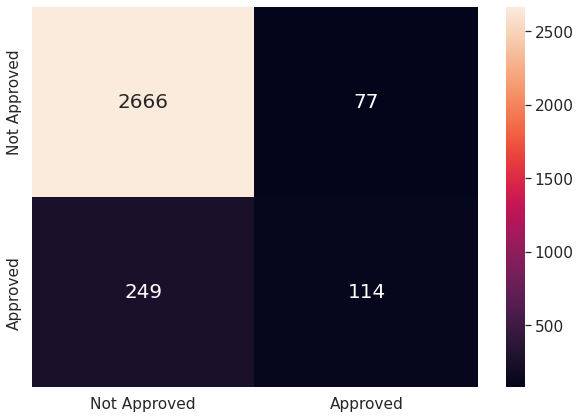

In [67]:
df_cm = pd.DataFrame(cm)
df_cm.index = ['Not Approved', 'Approved']
df_cm.columns = ['Not Approved', 'Approved']
names=['Not Approved', 'Approved']
print(df_cm)
fig = plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,fmt="d",annot_kws={"size": 20})

In [68]:
from pyspark.ml.classification import RandomForestClassifier
rdf =  RandomForestClassifier(labelCol="label",featuresCol="features")
from pyspark.ml import Pipeline
rdf_pipeline = Pipeline(stages=preprocessingStages+[rdf])
rdf_pipeline_model = rdf_pipeline.fit(trainingData)

In [71]:
train_predictions_rdf = rdf_pipeline_model.transform(trainingData)

In [72]:
train_predictions_rdf.select('features').show(truncate=False)

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                                                                             |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|(70,[1,2,5,16,18,21,22,52,54,57,67],[0.07328525909776958,0.033101621979477,0.02040816326530612,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])                                                     |
|(70,[1,2,5,16,18,22,41,54,62,67],[0.06983062217004862,0.039390930155577625,0.04081632653061224,1.0,1.0,1.0,1.0,1.0,1.0,1.0])                                                         |
|(70,[0,1,2,3,4,5,16,18,19,22,41,56,68],[0.014705882352941176,0.0795908099949689

In [73]:
train_predictions_rdf.show()

+---+------------+-------------+---------+-------+-------+-------+----+---------+----+-----+--------+--------+-----+--------+--------+------------------------+--------------------+--------------------+---------+-------------------+---------------+-------------+-------------+----------+-------------+-----------+--------------+---------------+-----------------+-------------+-------------+-------------+---------------+-------------+--------------+-------------+--------------------+--------------------+-----+--------------------+--------------------+----------+
|age|         job|maritalStatus|education|default|balance|housing|loan|  contact|date|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_yes_no|    num_features_all| scaled_num_features|job_index|maritalStatus_index|education_index|default_index|housing_index|date_index|contact_index|month_index|poutcome_index|        job_vec|maritalStatus_vec|education_vec|  default_vec|  housing_vec|       date_vec|  contact_vec|   

In [74]:
test_predictions_rf = rdf_pipeline_model.transform(testingData)

In [75]:
test_predictions_rf.select('features').show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                                                             |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|(70,[1,2,16,18,19,22,35,54,57,67],[0.07995975180278382,0.06653426017874876,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])                                                         |
|(70,[1,2,5,16,18,22,33,54,62,67],[0.10903907429146402,0.1519364448857994,0.3469387755102041,1.0,1.0,1.0,1.0,1.0,1.0,1.0])                                            |
|(70,[0,1,2,16,18,19,22,40,54,61,67],[0.014705882352941176,0.08666778467214489,0.08507116848725588,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])                            

In [77]:
test_predictions_rf.show()

+---+-----------+-------------+---------+-------+-------+-------+----+---------+----+-----+--------+--------+-----+--------+--------+------------------------+--------------------+--------------------+---------+-------------------+---------------+-------------+-------------+----------+-------------+-----------+--------------+---------------+-----------------+-------------+-------------+-------------+---------------+-------------+--------------+-------------+--------------------+--------------------+-----+--------------------+--------------------+----------+
|age|        job|maritalStatus|education|default|balance|housing|loan|  contact|date|month|duration|campaign|pdays|previous|poutcome|opened_new_td_act_yes_no|    num_features_all| scaled_num_features|job_index|maritalStatus_index|education_index|default_index|housing_index|date_index|contact_index|month_index|poutcome_index|        job_vec|maritalStatus_vec|education_vec|  default_vec|  housing_vec|       date_vec|  contact_vec|     

In [79]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
predictionAndLabels_train_rdf = train_predictions_rdf.select("prediction","label")
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
train_accuracy_rdf = evaluator.evaluate(predictionAndLabels_train_rdf)
print("Training Set Accuracy = ",train_accuracy_rdf)
print("Training error ", 1-train_accuracy_rdf)

Training Set Accuracy =  0.8837733419188667
Training error  0.1162266580811333


In [81]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
predictionAndLabels_test_rdf = test_predictions_rf.select("prediction","label")
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
test_accuracy_rdf = evaluator.evaluate(predictionAndLabels_test_rdf)
print("Training Set Accuracy = ",test_accuracy_rdf)
print("Training error ", 1-test_accuracy_rdf)

Training Set Accuracy =  0.8882602545968883
Training error  0.11173974540311171


In [82]:
train_pred_pandas = predictionAndLabels_train_rdf.toPandas()
train_actuals = train_pred_pandas.label.tolist()
train_predictions = train_pred_pandas.prediction.tolist()


test_pred_pandas = predictionAndLabels_test_rdf.toPandas()
test_actuals = test_pred_pandas.label.tolist()
test_predictions = test_pred_pandas.prediction.tolist()
from sklearn import metrics as smetrics
cm = smetrics.confusion_matrix(train_actuals, train_predictions) 

              Not Approved  Approved
Not Approved          2743         0
Approved               361         2


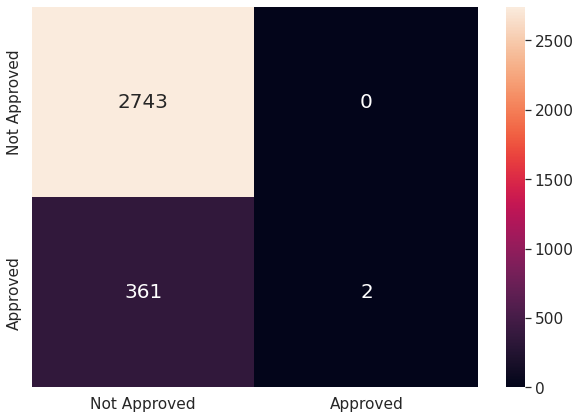

In [83]:
df_cm = pd.DataFrame(cm)
df_cm.index = ['Not Approved', 'Approved']
df_cm.columns = ['Not Approved', 'Approved']
names=['Not Approved', 'Approved']
print(df_cm)
fig = plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,fmt="d",annot_kws={"size": 20})

In [84]:
#im conducting visualization by converting toPandas, why im doing like that means i dont know about CHART STUDIO, so thats why im choosing this way